# OCR with classification.
> Jakub Darul, MOwNiT Lab9

In [1]:
import numpy as np
from functional import seq
import string
import os
from functional import seq

In [2]:
from image_processing.commons import *
from image_processing.generating import *
from image_processing.paragraph import *
from image_processing.line import *
from notebook_helpers import *
from image_processing.classification_helpers import *
from image_processing.classification import *
from image_processing.composed import *
from image_processing.word import word_to_letters

/home/jacko/.local/lib/python3.5/site-packages/pandas/core/computation/__init__.py:18: UserWarning: The installed version of numexpr 2.4.3 is not supported in pandas and will be not be used
The minimum supported version is 2.4.6

  ver=ver, min_ver=_MIN_NUMEXPR_VERSION), UserWarning)


Using TensorFlow backend.


In [3]:
txt = """
SAMPSON
  Gregory, o’ my word, we’ll not carry coals.
GREGORY
  No, for then we should be colliers.
SAMPSON
  I mean, an we be in choler, we’ll draw.
GREGORY
  Ay, while you live, draw your neck out 
o’ the collar.
SAMPSON
  I strike quickly, being moved.
GREGORY
  But thou art not quickly moved to strike.
SAMPSON
  A dog of the house of Montague moves me.
GREGORY
  To move is to stir; and to be valiant is to 
stand: therefore, if thou art moved, thou runn’st away.""".lower().replace("’","").replace(";","").replace(":","")


text = text_img(txt,(1500,1500))

In [4]:
rotated = rotate(np.asarray(text), 35)*255

In [5]:
plot_gray(rotated)

In [6]:
orig_img = 255 - rotated
img  = threshold(orig_img,threshold =230)

In [7]:
str_img,str_original_img = streighten_text_images(img,orig_img)

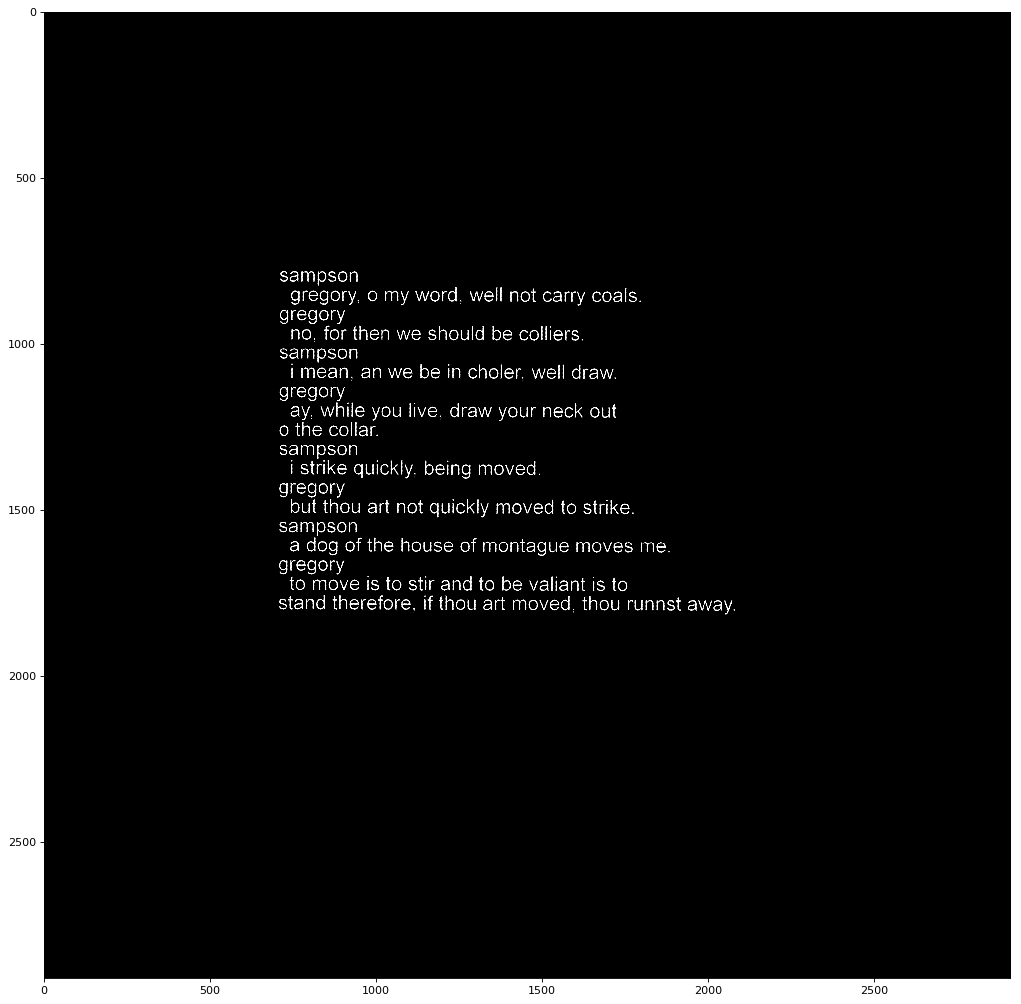

In [8]:
set_big_plot()
plot_gray(str_img)

In [9]:
img_words,orig_img_words = straight_images_to_words(str_img,str_original_img,font_size=60)  # list

/home/jacko/.local/lib/python3.5/site-packages/pandas/core/indexing.py:179: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



# OCRing
1. Added option to reduce noise ( low rank approximation), but it doesn't affect accurracy, nor subjective quality of ocr.

In [10]:
test_img_shape=(40,40)
with_ratio = True  # whether to use letter height_to with ratio as additional feature
noise_reduction=0.6

# accepted_chars = string.ascii_lowercase +"?.!,"
accepted_chars = string.ascii_lowercase +"?.!,"+string.digits

In [11]:
features_nb= test_img_shape[0]*test_img_shape[1]
if with_ratio:
    features_nb+=1
fonts = seq(os.listdir("fonts")).map(lambda name : "fonts/"+name)

# Classification with keras.

In [12]:
# model = get_model(features_nb,len(accepted_chars))
# model.load_weights('classification_weights.h5')

In [13]:
data = generate_letter_data(fonts,accepted_chars,30,test_img_shape,with_ratio=with_ratio,noise_reduction=noise_reduction)

/home/jacko/.local/lib/python3.5/site-packages/skimage/transform/_warps.py:84: UserWarning:

The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.



Train on 802 samples, validate on 198 samples
Epoch 1/35
802/802 [==============================] - 0s - loss: 2.8752 - acc: 0.3379 - val_loss: 2.1896 - val_acc: 0.5051
Epoch 2/35
802/802 [==============================] - 0s - loss: 1.5384 - acc: 0.8092 - val_loss: 1.3607 - val_acc: 0.7980
Epoch 3/35
802/802 [==============================] - 0s - loss: 0.9531 - acc: 0.9239 - val_loss: 0.9570 - val_acc: 0.9192
Epoch 4/35
802/802 [==============================] - 0s - loss: 0.6868 - acc: 0.9451 - val_loss: 0.8192 - val_acc: 0.8838
Epoch 5/35
802/802 [==============================] - 0s - loss: 0.5389 - acc: 0.9613 - val_loss: 0.6245 - val_acc: 0.9596
Epoch 6/35
802/802 [==============================] - 0s - loss: 0.4359 - acc: 0.9676 - val_loss: 0.5419 - val_acc: 0.9545
Epoch 7/35
802/802 [==============================] - 0s - loss: 0.3700 - acc: 0.9738 - val_loss: 0.4907 - val_acc: 0.9444
Epoch 8/35
802/802 [==============================] - 0s - loss: 0.3247 - acc: 0.9763 - val_l

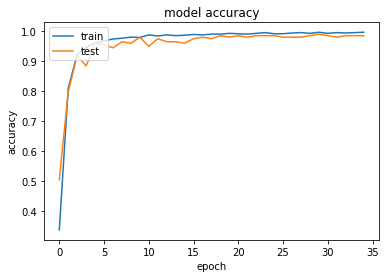

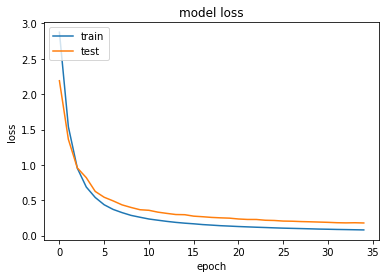

In [14]:
model,history = train_ocr_model(data,batch_size=10,epochs=35)
plot_history(history)
model.save_weights('classification_weights.h5')

In [15]:
set_big_plot()
plot_gray(trim_img_arr(str_img))

In [16]:
text = ocr(img_words,model,accepted_chars,with_ratio,noise_reduction)

/home/jacko/.local/lib/python3.5/site-packages/skimage/transform/_warps.py:84: UserWarning:

The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.



In [17]:
print(text)

samps0n
greg0ry, 0 my w0rd, well n0t carrv c0als.
greg0ry
n0, mr them we sh0uld be c0lliers.
samps0n
i mean, an we be in ch0ler, well draw.
greg0ry
ay, while y0u live, draw y0ur neck 0ut
c the c0llar.
samps0n
i strike quickly, being m0ved.
greg0ry
bu1 th0u ar1 n0t quickly m0ved to s1rike.
samps0m
a d0g 0f the h0mse 0f m0ntague m0ves me.
greg0ry
t0 mcve is t0 stir and t0 be valiant is t0
s1and therekre, if th0u ar1 m0ved, th0u rummst away.


In [18]:
count_letters(text)

Counter({'\n': 17,
         ' ': 67,
         ',': 10,
         '.': 8,
         '0': 38,
         '1': 5,
         'a': 22,
         'b': 5,
         'c': 10,
         'd': 10,
         'e': 35,
         'f': 3,
         'g': 13,
         'h': 11,
         'i': 16,
         'k': 6,
         'l': 16,
         'm': 19,
         'n': 15,
         'o': 1,
         'p': 4,
         'q': 2,
         'r': 28,
         's': 20,
         't': 20,
         'u': 12,
         'v': 8,
         'w': 9,
         'y': 12})

In [19]:
txt= """1 In the beginning God created the heaven and the earth.

2 And the earth was without form, and void; and darkness was upon the face of the deep. 

And the Spirit of God moved upon the face of the waters.

3 And God said, Let there be light: and there was light.

4 And God saw the light, that it was good: and God divided the light from the darkness.
"""

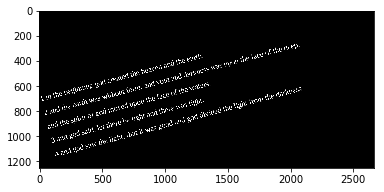

In [20]:
txt = txt.lower().replace(":","").replace(";","")
text = text_img(txt,(600,2600),ttf= fonts[4])
rotated = rotate(np.asarray(text), np.random.randint(-30,30))*255
plot_gray(rotated)

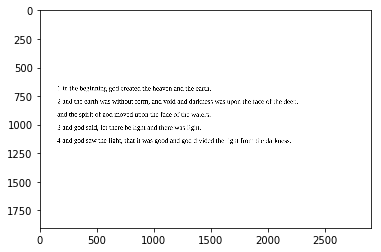

In [21]:
black = rotated
white = np.abs(255-rotated)
str_black,str_white = streighten_text_images(black,white)
plot_gray(str_white)


In [22]:
bible_words = straight_image_to_words(str_black)

/home/jacko/.local/lib/python3.5/site-packages/pandas/core/indexing.py:179: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



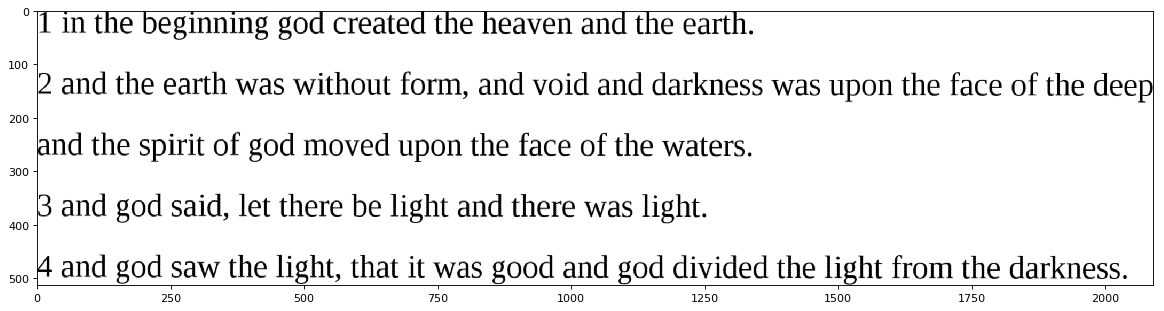

In [23]:
set_big_plot()
plot_gray(trim_img_arr(str_white,255))

In [24]:
text = ocr(bible_words,model,accepted_chars)
print(text)

/home/jacko/.local/lib/python3.5/site-packages/skimage/transform/_warps.py:84: UserWarning:

The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.



1 in rhe beginning g0d created rhe heaven and rhe eahh.
2 and rhe eahh was with0ut mrm, and v0id and damness was up0n rhe mce 0f rhe deep.
and rhe spirit 0f g0d m0ved up0n rhe mce 0f rhe waters.
3 and g0d said, ret there be right and there was light.
4 and g0d sah the light, that it was g00d and g0d divided the right wm the dainess.


In [25]:
count_letters(text)

Counter({'\n': 4,
         ' ': 66,
         ',': 3,
         '.': 5,
         '0': 15,
         '1': 1,
         '2': 1,
         '3': 1,
         '4': 1,
         'a': 23,
         'b': 2,
         'c': 3,
         'd': 25,
         'e': 34,
         'f': 3,
         'g': 12,
         'h': 26,
         'i': 16,
         'l': 2,
         'm': 7,
         'n': 18,
         'p': 4,
         'r': 18,
         's': 12,
         't': 18,
         'u': 3,
         'v': 4,
         'w': 7})